<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#173F8A;"> Ecuaciones Diferenciales MAT1640</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 3: Ecuaciones Diferenciales de Primer Orden</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

<h1 style="margin-bottom:0.5cm;">Tabla de Contenidos:<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-14:" data-toc-modified-id="Clase 14:">Clase 14:</a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-21:" data-toc-modified-id="Clase 21:">Clase 21:</a>
            </span>
        </li>
    </ul>
</div>


In [2]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Clase 14:

### Vibraciones mecanicas



#### Movimiento libre no amortiguado

\begin{equation}
m x'' + kx = 0, \quad x(t) = A\cos(\omega_0 t) B \sin(\omega_0 t)
\end{equation}

5.81953769817878


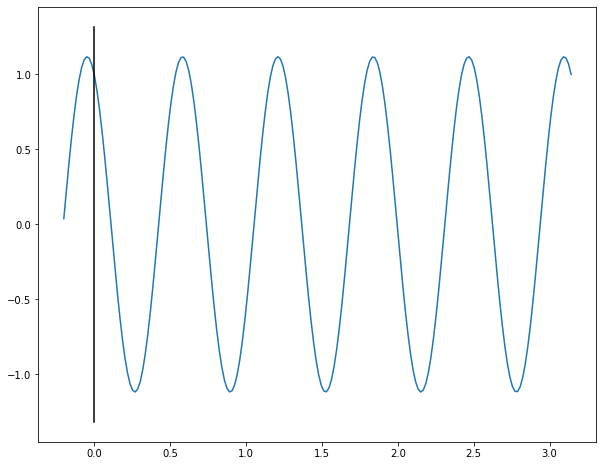

In [16]:
m = 0.5; k =50
omega0 = np.sqrt(1/m*k)
C = np.sqrt(5.0)/2.0
alpha = 2*np.pi + np.arctan2(-1.0/np.sqrt(5.0),(2.0/np.sqrt(5.0)))
print(alpha)
x = lambda t: C *np.cos(omega0*t - alpha)
plt.figure(figsize=(10,8))
t = np.linspace(-0.2,np.pi,200)
plt.plot(t, x(t))
plt.plot([0,0],[-C-0.2, C+0.2], 'k')
plt.show()

#### Movimiento  amortiguado libre
 
\begin{equation}
x'' + 2p + \omega_0^2 x = 0, \quad p = \frac{c}{2m}>0
\end{equation}

1. Sobre amortiguado: $c > c_{cr} = \sqrt{4km} $
\begin{equation}
x(t) = C_1 e^{r_1 t} + C_2 e^{r_2 t}
\end{equation}
2. Criticamente amortiguado: $c = c_{cr}$
\begin{equation}
x(t) = (C_1+C_2t) e^{r t}
\end{equation}
3. Sub amortiguado: $c < c_{cr}$
\begin{equation}
x(t) = e^{-p t}(A \cos(\omega_1 t) + B \sin(\omega_1 t);\quad \omega_1 = \sqrt{\omega_0^2-p^2}
\end{equation}

-13.701562118716424 -7.298437881283576


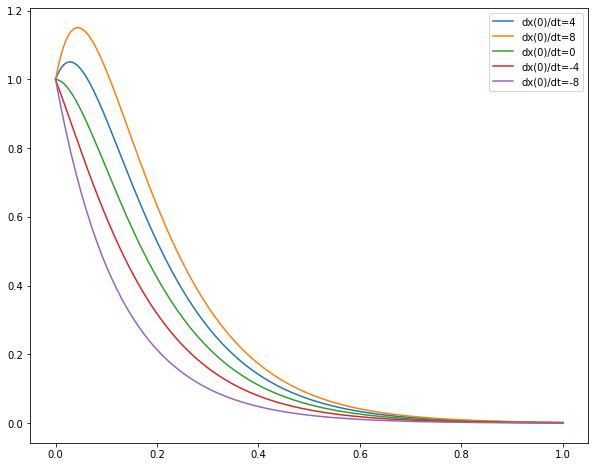

In [33]:
m = 0.5; k =50; 
ccr = np.sqrt(4*k*m)
omega0 = np.sqrt(1.0/m*k)
# Condicion inicial 
x0 = 1.0


# 1.  sub  amortiguado
c1 = ccr+0.5
p = c1/(2*m)
r1 = -p-np.sqrt(p**2-omega0**2)
r2 = -p+np.sqrt(p**2-omega0**2)
print(r1, r2)
x1 = lambda t, dx0:  (x0-(dx0-r1*x0)/(r2-r1))*np.exp(r1*t) + ((dx0-r1*x0)/(r2-r1))*np.exp(r2*t)  


plt.figure(figsize=(10,8))
t = np.linspace(0,1,200)
plt.plot(t, x1(t,4),label = 'dx(0)/dt=4')
plt.plot(t, x1(t,8),label = 'dx(0)/dt=8')
plt.plot(t, x1(t,0),label = 'dx(0)/dt=0')
plt.plot(t, x1(t,-4),label = 'dx(0)/dt=-4')
plt.plot(t, x1(t,-8),label = 'dx(0)/dt=-8')
plt.legend()
plt.show()

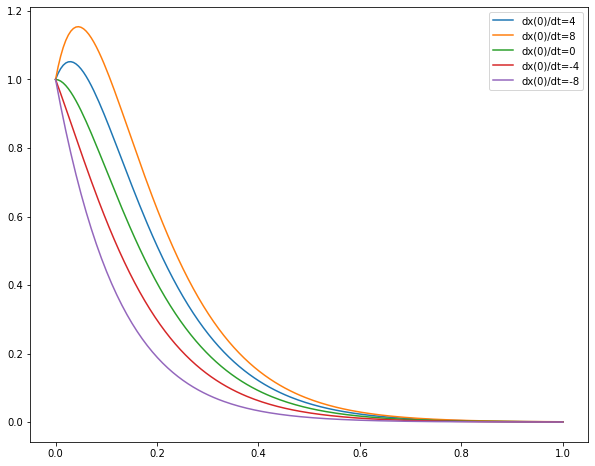

In [34]:

# 2.  Criticamente  amortiguado
c2 = ccr
p = c2/(2*m)
r = -p

x2 = lambda t, dx0:  (x0 + (dx0+p*x0)*t)*np.exp(r*t)  


plt.figure(figsize=(10,8))
t = np.linspace(0,1,200)
plt.plot(t, x2(t,4),label = 'dx(0)/dt=4')
plt.plot(t, x2(t,8),label = 'dx(0)/dt=8')
plt.plot(t, x2(t,0),label = 'dx(0)/dt=0')
plt.plot(t, x2(t,-4),label = 'dx(0)/dt=-4')
plt.plot(t, x2(t,-8),label = 'dx(0)/dt=-8')
plt.legend()
plt.show()

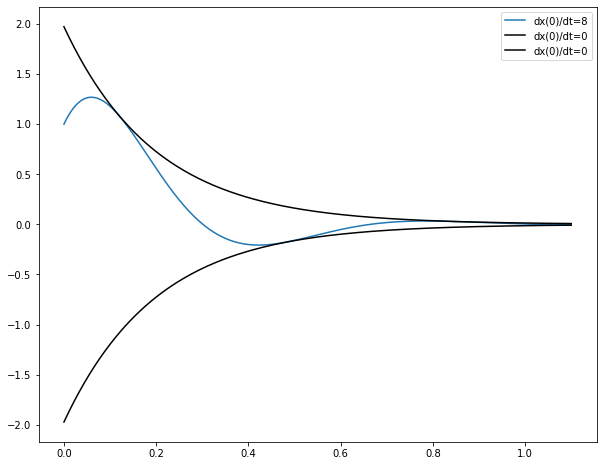

In [46]:
# 3.  Sub  amortiguado
c3 = ccr-5
p = c3/(2*m)
omega0=np.sqrt(k/m)

omega1 = np.sqrt(omega0**2-p**2)
A = x0
B = lambda dx0: ((dx0+x0)/omega0)
x3 = lambda t, dx0: np.exp(-p*t)*(A*np.cos(omega1*t)+B(dx0)*np.sin(omega1*t))

boundt = lambda t, dx0: np.sqrt(A**2+B(dx0)**2)*np.exp(-p*t)
boundb = lambda t, dx0: -np.sqrt(A**2+B(dx0)**2)*np.exp(-p*t)
plt.figure(figsize=(10,8))
t = np.linspace(0,1.1,200)

plt.plot(t, x3(t,16),label = 'dx(0)/dt=8')
plt.plot(t, boundt(t,16),'k',label = 'dx(0)/dt=0')
plt.plot(t, boundb(t,16),'k', label = 'dx(0)/dt=0')
plt.legend()
plt.show()

### Resonancia


\begin{equation}
m x'' + kx = F_0\cos(\omega t)
\end{equation}

0.1414213562373095
7.0710678118654755


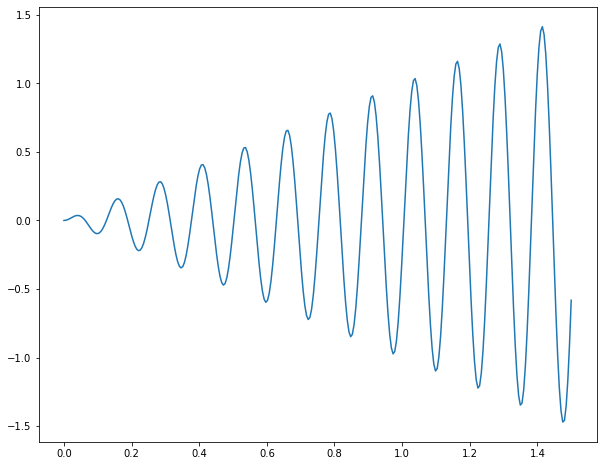

In [54]:
m = 1; k =1.0/50.0; F0 = 100
omega0 = np.sqrt(1.0/m*k)
print(omega0)
epsilon  = 0.1
omega = omega0+epsilon;
alpha = 2*np.pi + np.arctan2(-1.0/np.sqrt(5.0),(2.0/np.sqrt(5.0)))

x0 = 0 
dx0 = 1
CC = F0/m*(omega**2-omega**2)
# C_1 + CC = x0
# omega0*C_2 = dx0
C_2 = dx0/omega0
C_1 = x0 - CC
print(C_2)
xc = lambda t: C_1 *np.cos(omega0*t) + C_2 *np.sin(omega0*t)
xp = lambda t: CC*np.cos(omega*t)
plt.figure(figsize=(10,8))
t = np.linspace(0,1.5,300)

xp = lambda t: t * np.sin(50*t)
plt.plot(t, xp(t))
plt.show()

## Clase 21

## Sistemas no lineales

In [3]:

def campo_de_pendientes(rng, f1,f2, num_points):
    arrowcolor = 'C7'
    l_rng = rng[1]-rng[0]
    #l_rng = min(rng[1]-rng[0], rng[3]-rng[2])
    #a = sym.lambdify((x, y), function)  # function a is the differential#
    
    X, Y = np.meshgrid(np.linspace(rng[0], rng[1], num_points),
                       np.linspace(rng[2], rng[3], num_points))
    f1val = f1(X,Y)
    f2val = f2(X,Y)
    delta_x = f1val
    delta_y = f2val
    length = np.sqrt(delta_x**2 + delta_y**2)
    delta_x, delta_y = delta_x/length, delta_y/length
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.set_title(r'Campo de pendientes')
    ax.set_xlabel(r'$\mathit{x}$')
    ax.set_ylabel(r'$\mathit{y}$')
    ax.grid()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    #ax.set_aspect(1. / ax.get_data_ratio())
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.quiver(X, Y, delta_x, delta_y,
               pivot='mid',
               scale_units='xy', angles='xy', scale=16/l_rng, width=0.0025,color=arrowcolor, headwidth=3.5, headlength=5
               )
    #plt.show()
    return fig, ax
import sympy as sym

#plt.style.use('seaborn-whitegrid')
x, y = sym.symbols('x, y')

### Ejemplo 1.

\begin{align*}
\frac{dx}{dt}& = 14 x - 2x^2 - xy \\
\frac{dy}{dt}& = 16y - 2y^{2} -xy
\end{align*}

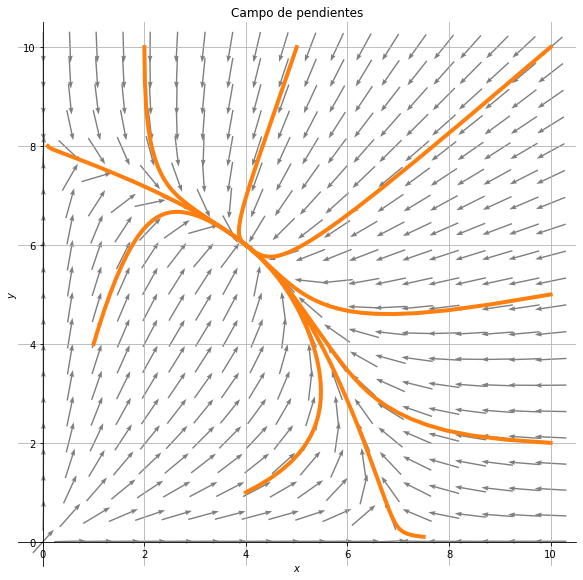

In [57]:
f1 = lambda x, y: 14.0*x - 2*x**2 - x*y
f2 = lambda x, y: 16.0*y - 2*y**2 - x*y
fig, ax = campo_de_pendientes([0.01,10,0.01,10], f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example1(t,z):
    x,y = z
    return [14.0*x - 2*x**2 - x*y,16.0*y - 2*y**2 - x*y]

tf = 40
# puntos iniciales
t = np.linspace(0, tf, 3000)
zlist = [[0.1,8], [7.5, 0.1], [2, 10], [10,10], [5,10], [10,5], [4,1], [10,2], [1,4] ]
for z in zlist:
    sol = solve_ivp(fun_example1, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
plt.show()

### Ejemplo 2.

\begin{align*}
\frac{dx}{dt}& = x-y \\
\frac{dy}{dt}& = 1-x^2
\end{align*}

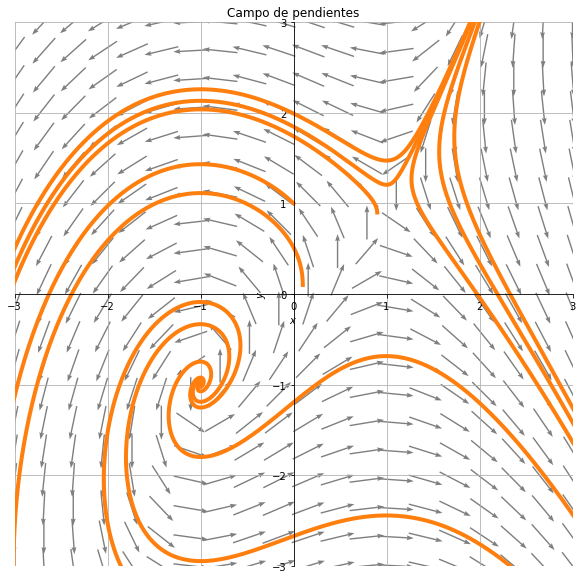

In [87]:
f1 = lambda x, y: x-y
f2 = lambda x, y: 1-x**2
fig, ax = campo_de_pendientes([-3,3,-3,3], f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example2(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[0.1,0.1],[0.9,0.9],[0,1],[2,3],[1.9,3],[1.95,3],[1.91,3],[1.905,3],[-1.01,-1.01],[-1,-1.01],[-1,-0.99]]
for z in zlist:
    sol = solve_ivp(fun_example2, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-3,3])
    ax.set_xlim([-3,3])
plt.show()

### Ejemplo 3.

\begin{align*}
\frac{dx}{dt}& = -x \\
\frac{dy}{dt}& = -ky
\end{align*}

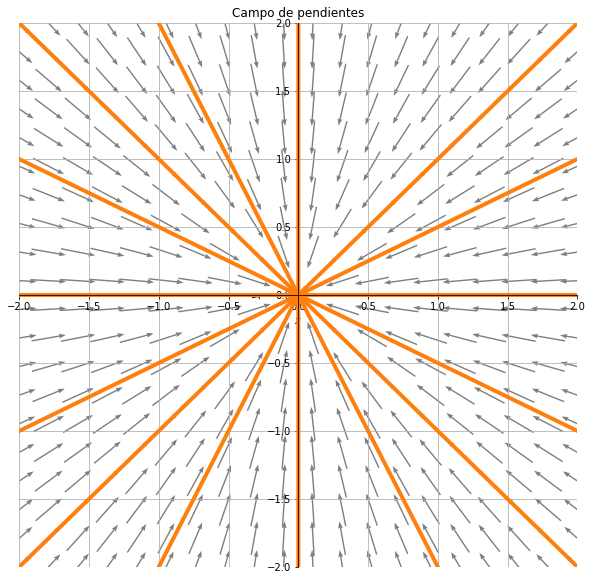

In [52]:
k = 1
f1 = lambda x, y: -1.0*x
f2 = lambda x, y: -k*y
fig, ax = campo_de_pendientes([-2.0,2.0,-2.0,2.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example3(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[-2,2],[2,2],[2,-2],[-2,-2],[-1,2],[-2,1],[2,1],[-2,-1],[2,-1],[-1,-2],[1,-2],[0,2],[0,-2],[-2,0],[2,0]]
for z in zlist:
    sol = solve_ivp(fun_example3, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-2,2])
    ax.set_xlim([-2,2])
plt.show()

### Ejemplo 4.

\begin{align*}
\frac{dx}{dt}& = y \\
\frac{dy}{dt}& = -\omega^2 x
\end{align*}

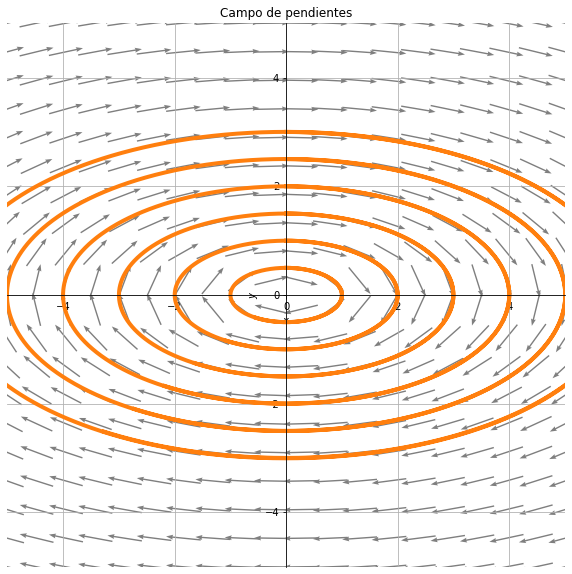

In [105]:
omega = 1.0/2.0
f1 = lambda x, y: 1.0*y
f2 = lambda x, y: -omega**2*x
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example4(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[0,0.5],[0,1.0],[0,1.5],[0,2],[0,2.5],[0,3]]
for z in zlist:
    sol = solve_ivp(fun_example4, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

### Ejemplo 5.

\begin{align*}
\frac{dx}{dt}& = y \\
\frac{dy}{dt}& = -2x - 2y
\end{align*}

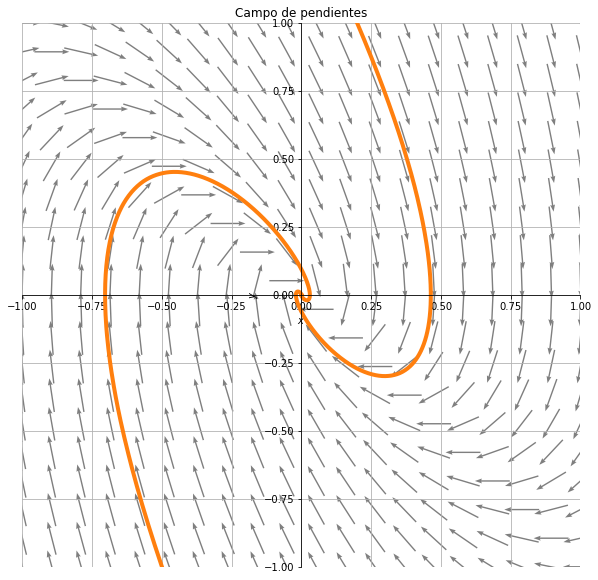

In [134]:
omega = 1.0/2.0
f1 = lambda x, y: 1.0*y
f2 = lambda x, y: -2*x-2*y
fig, ax = campo_de_pendientes([-1.0,1.0,-1.0,1.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example5(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

# zlist = [[-.5,-1],[-.7,-1],[-.3,-1],[0,-1],[0.3,-1],[0.5,-1],[-.7,1],[-.2,1],[.2,1]]
zlist = [[-.5,-1],[.2,1]]

for z in zlist:
    sol = solve_ivp(fun_example5, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-1,1])
    ax.set_xlim([-1,1])
plt.show()

### Ejemplo 6.

\begin{align*}
\frac{dx}{dt}& = -ky + x(1-x^2-y^2) \\
\frac{dy}{dt}& = kx + y(1-x^2-y^2)
\end{align*}

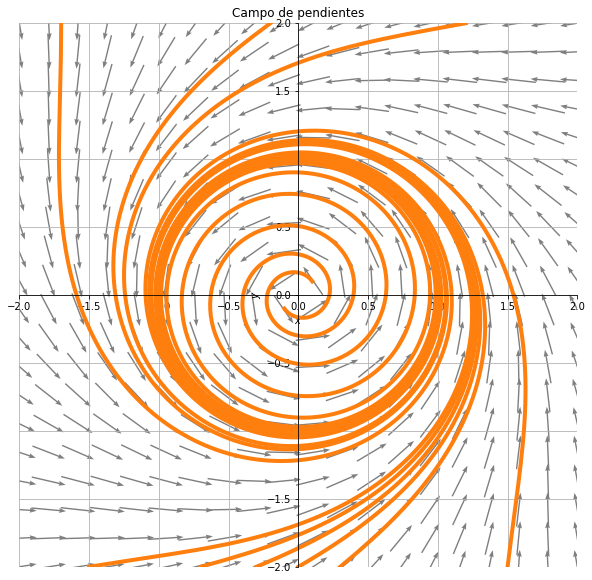

In [128]:
k = 5
f1 = lambda x, y: -k*y + x*(1-x**2-y**2)
f2 = lambda x, y: k*x+y*(1-x**2-y**2)
fig, ax = campo_de_pendientes([-2.0,2.0,-2.0,2.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example6(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[-1.5,-2],[-.7,-2],[-.3,-2],[0,-2],[0.3,-2],[1.5,-2],[-1.7,2],[-.2,2],[1.2,2],[0.1,0.1],[-0.1,-0.1]]
for z in zlist:
    sol = solve_ivp(fun_example6, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-2,2])
    ax.set_xlim([-2,2])
plt.show()

## Clase 22

### sistemas linealizados


## Ejemplo 1: Reales diferentes del mismo signo

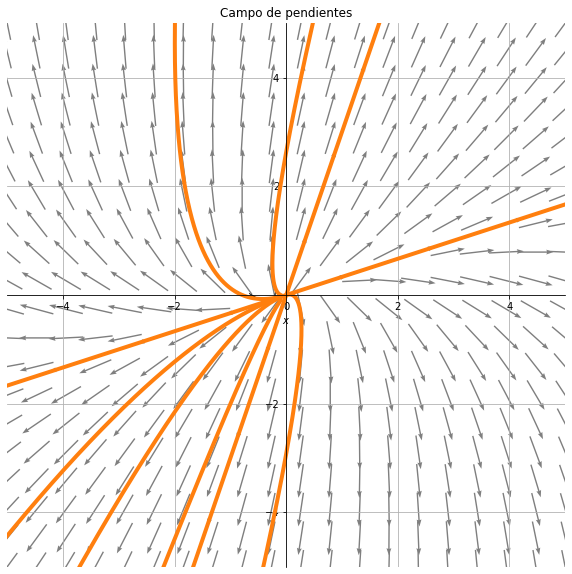

In [28]:
f1 = lambda x, y: 1.0/8.0*(7*x + 3*y)
f2 = lambda x, y: 1.0/8.0*(-3*x+17*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[-0.01,-0.03],[0.01,0.03],[0.03,0.01],[0.05,0.01], [-0.1,0.001],[-0.03,-0.01], [-0.1,-0.1],[-0.1,-0.03],[-0.1,-0.04],[-0.1,-0.035]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

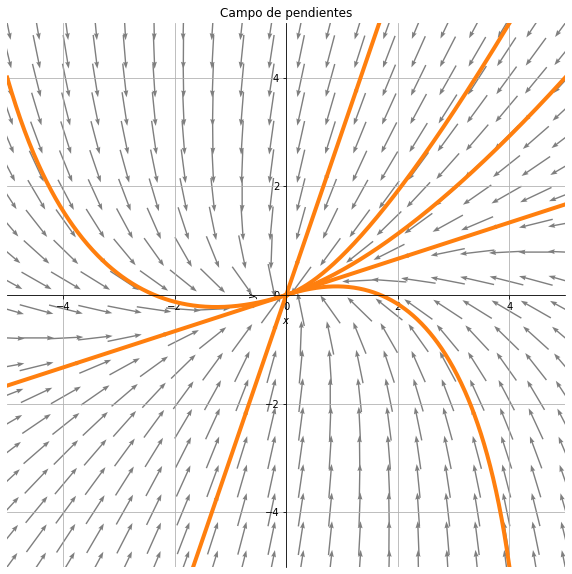

In [34]:
f1 = lambda x, y: -1.0/8.0*(7.0*x + 3.0*y)
f2 = lambda x, y: -1.0/8.0*(-3.0*x+17.0*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[5.0/3.0,5], [-5.0/3.0,-5], [5.0,5/3.0], [-5.0,-5/3.0],[-5,4],[4,-5],[5,4],[4,5]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

## Ejemplo 2: Reales diferentes , distinto signo


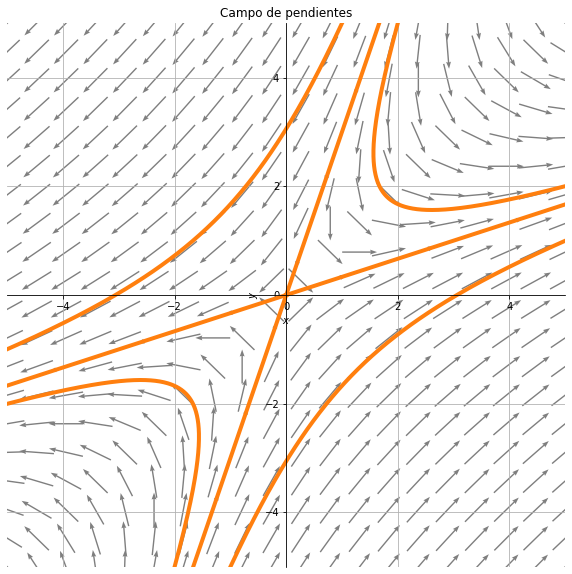

In [39]:
f1 = lambda x, y: 1.0/4.0*(5.0*x - 3.0*y)
f2 = lambda x, y: 1.0/4.0*(3.0*x-5.0*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[5.0/3.0,5], [-5.0/3.0,-5], [(0.0001)*5.0,(0.0001)*5/3.0], [-(0.0001)*5.0,-(0.0001)*5/3.0],
         [-1,-5],[-2,-5],[1,5],[2,5]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

## Ejemplo 3: Reales e iguales


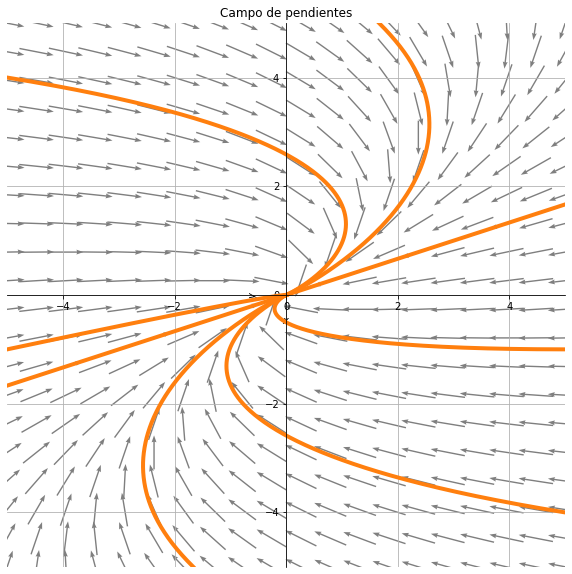

In [42]:
f1 = lambda x, y: 1.0/8.0*(-11.0*x + 9.0*y)
f2 = lambda x, y: 1.0/8.0*(-1.0*x-5.0*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[5.0/3.0,5], [-5.0/3.0,-5], [5.0,5/3.0], [-5.0,-5/3.0],
         [-5,4],[-5,-1],[5,-1],[5,-4]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

## Ejemplo 4: complejos y conjugados, parte real no cero


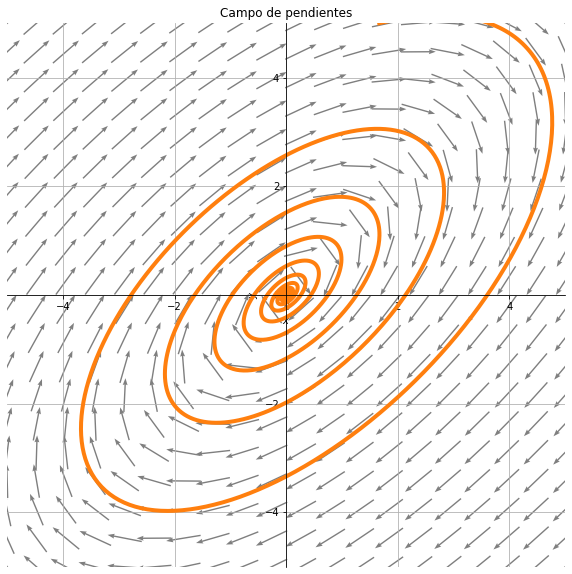

In [45]:
f1 = lambda x, y: 1.0/4.0*(-10.0*x + 15.0*y)
f2 = lambda x, y: 1.0/4.0*(-15.0*x+8.0*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[5.0/3.0,5]]#, [-5.0/3.0,-5], [5.0,5/3.0], [-5.0,-5/3.0]]
#         [-5,4],[-5,-1],[5,-1],[5,-4]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()

## Ejemplo 5: complejos y conjugados, parte real cero


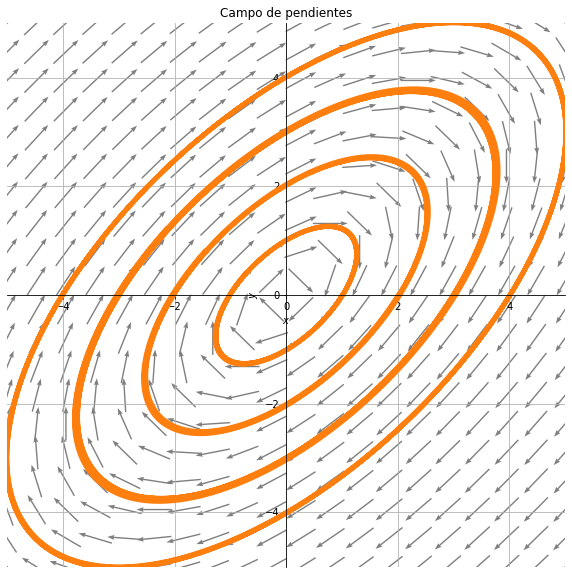

In [51]:
f1 = lambda x, y: 1.0/4.0*(-9.0*x + 15.0*y)
f2 = lambda x, y: 1.0/4.0*(-15.0*x+9.0*y)
fig, ax = campo_de_pendientes([-5.0,5.0,-5.0,5.0],f1,f2, num_points=20)

from scipy.integrate import solve_ivp
def fun_example(t,z):
    x,y = z
    return [f1(x,y), f2(x,y)]

tf = 20
# puntos iniciales
t = np.linspace(0, tf, 3000)

zlist = [[4,0],[3.0,0], [2.0,0], [1.0,0]]
for z in zlist:
    sol = solve_ivp(fun_example, [0, tf], z, method = 'BDF', dense_output=True)
    zt = sol.sol(t)
    ax.plot(zt[0], zt[1], 'C1', linewidth=4)
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
plt.show()